# TSNE

I tried out datashader with t-SNE just for fun, and I'm pretty sure the result is a total failure, but I made some pretty cool graphs. 

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.manifold import TSNE

### Bring in data

In [46]:
healthSet = pd.read_csv('trainY2_Y3.csv')

Set X and Y

In [47]:
Y  = healthSet['DaysInHospital'].copy()
X = healthSet.drop(['DaysInHospital'], axis=1) 

In [99]:
X.shape

(104495, 103)

Set TSNE, reducing 103 variables to 2 components is a unrealistic, but I wanted to see how the graphs came out.

In [48]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40)

Fit Transform TSNE

In [49]:
digits_proj = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 104495 samples in 3.896s...
[t-SNE] Computed neighbors for 104495 samples in 9.980s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104495
[t-SNE] Computed conditional probabilities for sample 2000 / 104495
[t-SNE] Computed conditional probabilities for sample 3000 / 104495
[t-SNE] Computed conditional probabilities for sample 4000 / 104495
[t-SNE] Computed conditional probabilities for sample 5000 / 104495
[t-SNE] Computed conditional probabilities for sample 6000 / 104495
[t-SNE] Computed conditional probabilities for sample 7000 / 104495
[t-SNE] Computed conditional probabilities for sample 8000 / 104495
[t-SNE] Computed conditional probabilities for sample 9000 / 104495
[t-SNE] Computed conditional probabilities for sample 10000 / 104495
[t-SNE] Computed conditional probabilities for sample 11000 / 104495
[t-SNE] Computed conditional probabilities for sample 12000 / 104495
[t-SNE] Computed conditional probab

In [60]:
palette = np.array(sns.color_palette("hls", 10))

In [53]:
plt.figure(figsize = (6,6))
plt.scatter(projection[:,0], projection[:,1],c=palette[Y])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 104495 but corresponding boolean dimension is 1797

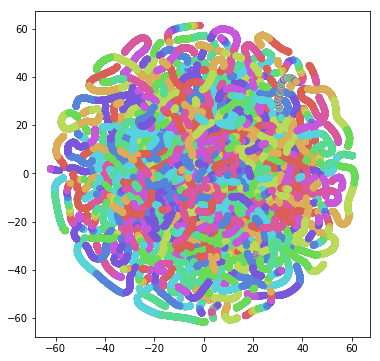

In [61]:
plot_scatter(digits_proj)

Ok, this might be very wrong and very useless, but it's kind of cool. Lets change the palette size:

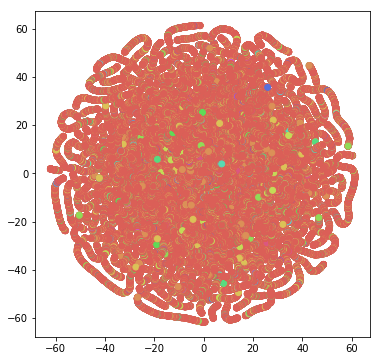

In [97]:
palette = np.array(sns.color_palette("hls", 16))
plt.figure(figsize = (6,6))
plt.scatter(digits_proj[:,0], digits_proj[:,1],c=palette[Y])

# Datashader

First we have to turn our numpy array into a dataframe and label the columns. 

If you have not used datashader:

    pip install datashader bokeh holoviews
or

    conda install datashader bokeh holoviews

In [69]:
columns=['PC1','PC2']

df = pd.DataFrame(digits_proj.reshape(len(digits_proj),2),columns=columns)
print (df)

              PC1        PC2
0       -8.596552   1.763038
1       -8.584865   1.781979
2       -8.571548   1.803537
3       -8.557248   1.826758
4       -8.517766   1.890187
5       -8.511324   1.900659
6       -8.497088   1.924080
7       -8.487778   1.939178
8       -8.471464   1.965549
9       -8.454084   1.993735
10      -8.453901   1.994032
11      -8.451194   1.998437
12      37.501644  38.038818
13      -8.349545   2.164494
14      37.506424  38.036316
15      -8.321221   2.211484
16      -8.265155   2.303916
17      -8.208283   2.399349
18      -8.111708   2.564849
19      -8.109993   2.567819
20      -8.100589   2.584312
21      -8.098750   2.587536
22      -8.084216   2.613250
23      -8.034757   2.701346
24      -8.027154   2.716360
25      -8.024410   2.721620
26      -8.009060   2.750311
27      -7.993262   2.780126
28      -7.967391   2.829488
29      -7.957429   2.848809
...           ...        ...
104465 -36.060238 -13.949897
104466 -36.118805 -13.904202
104467 -36.157

In [70]:
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import fire

Import needed libraries and then plot a static plot using Datashader.

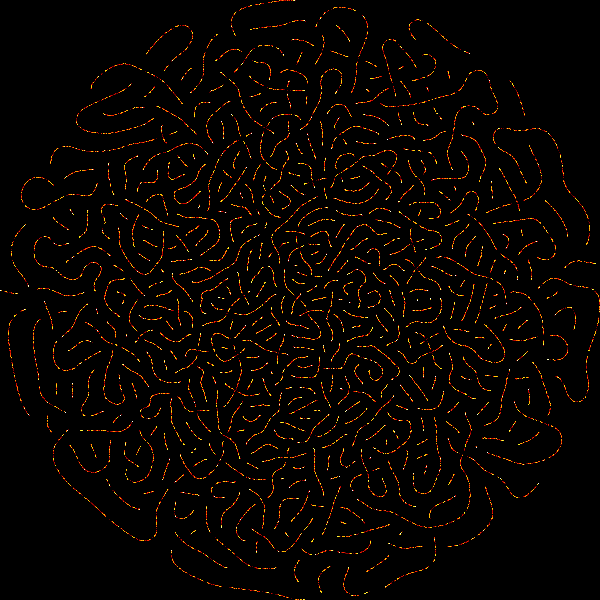

In [72]:
agg = ds.Canvas().points(df, 'PC1', 'PC2')
tf.set_background(tf.shade(agg, cmap=fire),"black")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
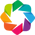

In [73]:
import holoviews as hv
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

Use Holoviews to create an interactive plot. Try it out, drag around and zoom in.

In [74]:
%%output size=200

points = hv.Points(df, ['PC1', 'PC2'])
taxi_trips = datashade(points, cmap=fire)
taxi_trips

:DynamicMap   []
   :RGB   [PC1,PC2]   (R,G,B,A)

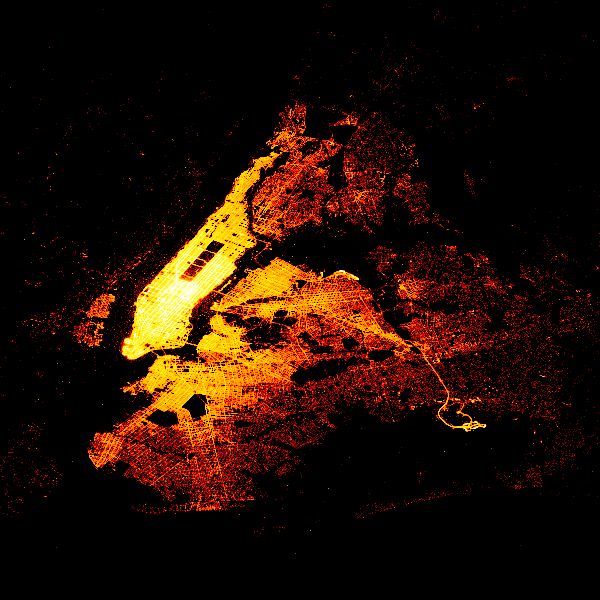

In [40]:
# Taxi cab data static plot using datashader

# Example from class so I am not sharing code, but check out http://datashader.org/getting_started/1_Introduction.html

Now with the holoviews. 

In [41]:
#Taxi cab data with datashader and haloviews 

# Example from class, check out http://datashader.org/getting_started/1_Introduction.html for more info

:DynamicMap   []
   :RGB   [dropoff_longitude,dropoff_latitude]   (R,G,B,A)

In [94]:
nyctaxi.count()

dropoff_longitude    14999854
dropoff_latitude     14999854
dtype: int64

14,999,854 rows of taxi data! That's insane!